In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from layers import FreeSpacePropagation
import time
import pandas as pd
import cv2
from cxlayers import AngularSpectrum, ImageResizing, ImageToElectricField, ImageBinarization, CxMO, CxD2NNFaradayRotation, CxD2NNIntensity, D2NNMNISTDetector, Polarizer, GGG, Softmax, D2NNMNISTFilter
import glob
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["font.size"]=18

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_test.shape

In [ ]:
train_num = 10
test_num = 10
total = train_num + test_num
train_data = {}
test_data = {}
for i in range(10):
  train_data[str(i)] = x_train[np.where(y_train == i)][0:train_num]
  test_data[str(i)] = x_test[np.where(y_test == i)][0:test_num]

In [3]:
shape = (100, 100)
inputs = tf.keras.Input((28, 28))
x = ImageResizing(shape)(inputs)
x = ImageBinarization(0.5, 0.0, 1.0)(x)
# x = ImageToElectricField(shape)(x)
# x = CxMO(shape, limitation=None, limitation_num=2.1 * np.pi / 180)(x)
# x = AngularSpectrum(shape, wavelength=531e-9, z=1.0e-3, d=1.0e-6, method='expand')(x)
# x = CxD2NNFaradayRotation(shape)(x)
# x = D2NNMNISTFilter(shape)(x)
# x = Polarizer(shape)(x)
# x = CxD2NNIntensity(shape)(x)
# x = D2NNMNISTDetector(10)(x)
# x = tf.keras.layers.Softmax()(x)
model = tf.keras.Model(inputs, x)

Metal device set to: Apple M1


2022-05-06 15:36:01.511278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-06 15:36:01.511570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


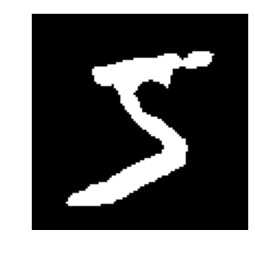

In [6]:
pred = model.predict(x_train[0:1,:,:])
plt.imshow(pred[0,:,:], cmap='gray')
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.grid(False)
plt.savefig("images/5.svg")

2022-05-02 11:26:45.893785: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-02 11:26:45.950846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6.9649305


/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_60865/286719516.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


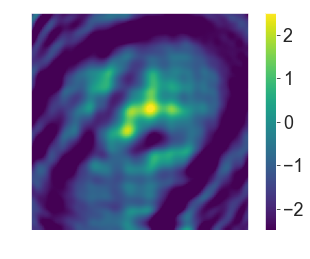

In [4]:
weights = model.layers[4].get_weights()
phase = ((np.loadtxt("data/phase/100px/train_7.csv")-0.5) * 2.0) * 2.1 * np.pi / 180
tx = np.linspace(-np.pi, np.pi, 100)
ty = np.linspace(-np.pi, np.pi, 100)
XX, YY = np.meshgrid(tx, ty)
W = np.sqrt(XX**2 + YY**2)
weights[0] = phase
model.layers[4].set_weights(weights)
image = np.ones((2, 28, 28))
pred = model.predict(image) * 180 / np.pi
plt.imshow(pred[0,:,:], cmap="viridis")
plt.colorbar()
plt.clim(-2.5, 2.5)
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.grid(False)
print(pred.max() - pred.min())

In [ ]:
pred = model.predict(x_train[0:1,:,:])
label = np.arange(0, 10, 1)
plt.bar(label, pred[0,:])
plt.grid(False)
plt.xticks(label, [str(i) for i in label])
plt.xlabel("Label")
plt.ylabel("Probability")

In [ ]:
model = tf.keras.models.load_model("test")
model.summary()

In [ ]:
def check_zero_range(x, eps):
    return -eps < x < eps

e = np.arange(-5, 5, 1.0)
x = 10.0**e
XX, YY = np.meshgrid(x, x)

a = tf.constant(XX, dtype=tf.float16)
b = tf.constant(YY, dtype=tf.float16)
arg = 2.0 * tf.atan((tf.sqrt(a**2 + b**2) - a)/b)

print(arg[np.isnan((arg.numpy()))].shape)
plt.imshow(np.isnan(arg.numpy()))


In [ ]:
columns = ["epoch", "pi/100", "pi/10", "pi/5", "pi/3", "pi/2", "pi"]
path = "trained_model/20220415_*/*.csv"
files = glob.glob(path)
files.sort()
data = []
a = pd.read_csv(files[0])
for i, file in enumerate(files):
    df = pd.read_csv(file)
    if i == 0:
        data.append(df.index.values + 1)
    data.append(df["accuracy"].values)
data = pd.DataFrame(np.array(data).T, columns=columns)
data.plot(x="epoch")

In [ ]:
x = np.arange(-50.0, 0.0).reshape((5, 10))
x_min = tf.reduce_min(x, axis=-1, keepdims=True)
tf.nn.softmax(x - x_min, axis=-1)

あいうえお

In [ ]:
def check_zero_range(x, eps):
    return -eps < x < eps

e = np.arange(-5, 5, 1.0)
x = 10.0**e
XX, YY = np.meshgrid(x, x)

a = tf.constant(XX, dtype=tf.float16)
b = tf.constant(YY, dtype=tf.float16)
arg = 2.0 * tf.atan((tf.sqrt(a**2 + b**2) - a)/b)

print(arg[np.isnan((arg.numpy()))].shape)
plt.imshow(np.isnan(arg.numpy()))


In [ ]:
columns = ["epoch", "pi/100", "pi/10", "pi/5", "pi/3", "pi/2", "pi"]
path = "trained_model/20220415_*/*.csv"
files = glob.glob(path)
files.sort()
data = []
a = pd.read_csv(files[0])
for i, file in enumerate(files):
    df = pd.read_csv(file)
    if i == 0:
        data.append(df.index.values + 1)
    data.append(df["accuracy"].values)
data = pd.DataFrame(np.array(data).T, columns=columns)
data.plot(x="epoch")

In [ ]:
x = np.arange(-50.0, 0.0).reshape((5, 10))
x_min = tf.reduce_min(x, axis=-1, keepdims=True)
tf.nn.softmax(x - x_min, axis=-1)

In [13]:
path = "trained_model/20220424_*"
files = glob.glob(path)
p = re.compile(r'\d+_\d+')
files.sort(reverse=False, key=lambda s: int(p.search(s).group()))
for file in files[6:]:
    model = tf.keras.models.load_model(file)
    phi = model.layers[-4].get_weights()[0] * 180/np.pi
    print(model.layers[4].limitation_num.numpy() * 180/np.pi,(phi + 180)%180)

1.8000000927782456 80.83268652502716
18.000000500895634 104.96656755204224
36.00000100179127 128.67429418003448
60.000001669652114 146.23434170592208
90.00000250447816 25.833646912820797
180.00000500895632 18.085579356101306


In [17]:
plt.imsave('images/5.png', x_train[0,:,:], dpi=300, cmap="")

In [57]:
path = 'trained_model/20220424_8'
model = tf.keras.models.load_model(path)

plt.rcParams["font.size"] = 20
output_class = CxD2NNIntensity
pattern = r'angular_spectrum'
outputs = [model.layers[2].output]
for layer in model.layers:
    result = re.match(pattern, layer.name)
    if result:
        outputs.append(output_class((100, 100))(layer.output))
# outputs.pop(-2)
outputs.append(D2NNMNISTFilter((100, 100))(model.layers[-3].output))
outputs.append(model.layers[-2].output)
hidden_layer_model = tf.keras.Model(model.inputs, outputs=outputs)
input_images = np.array([x_test[1,:,:], x_test[0,:,:]])
pred1 = hidden_layer_model.predict(input_images)

path = 'trained_model/20220425_5'
model = tf.keras.models.load_model(path)

output_class = CxD2NNFaradayRotation
pattern = r'angular_spectrum'
outputs = [model.layers[2].output]
for layer in model.layers:
    result = re.match(pattern, layer.name)
    if result:
        outputs.append(output_class((100, 100))(layer.output))
phi = model.layers[4].limitation_num.numpy()
outputs.append(D2NNMNISTFilter((100, 100))(model.layers[-3].output))
outputs.append(model.layers[-2].output)
hidden_layer_model = tf.keras.Model(model.inputs, outputs=outputs)
pred2 = hidden_layer_model.predict(input_images)

2022-05-05 08:08:17.761695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-05 08:08:18.899450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [58]:
pred = []
for i in range(len(pred1)):
    pred.append(np.concatenate([pred1[i], pred2[i]], axis=0))

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_71082/2034503474.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(axes[j, 6].images[0], cax=cbar_ax)
/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_71082/2034503474.py:58: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(axes[j, 0].images[0], cax=cbar_ax)
/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_71082/2034503474.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(axes[j, i].images[0], cax=cbar_ax, ticks=[-i*np.pi/100, 0, i*np.pi/10

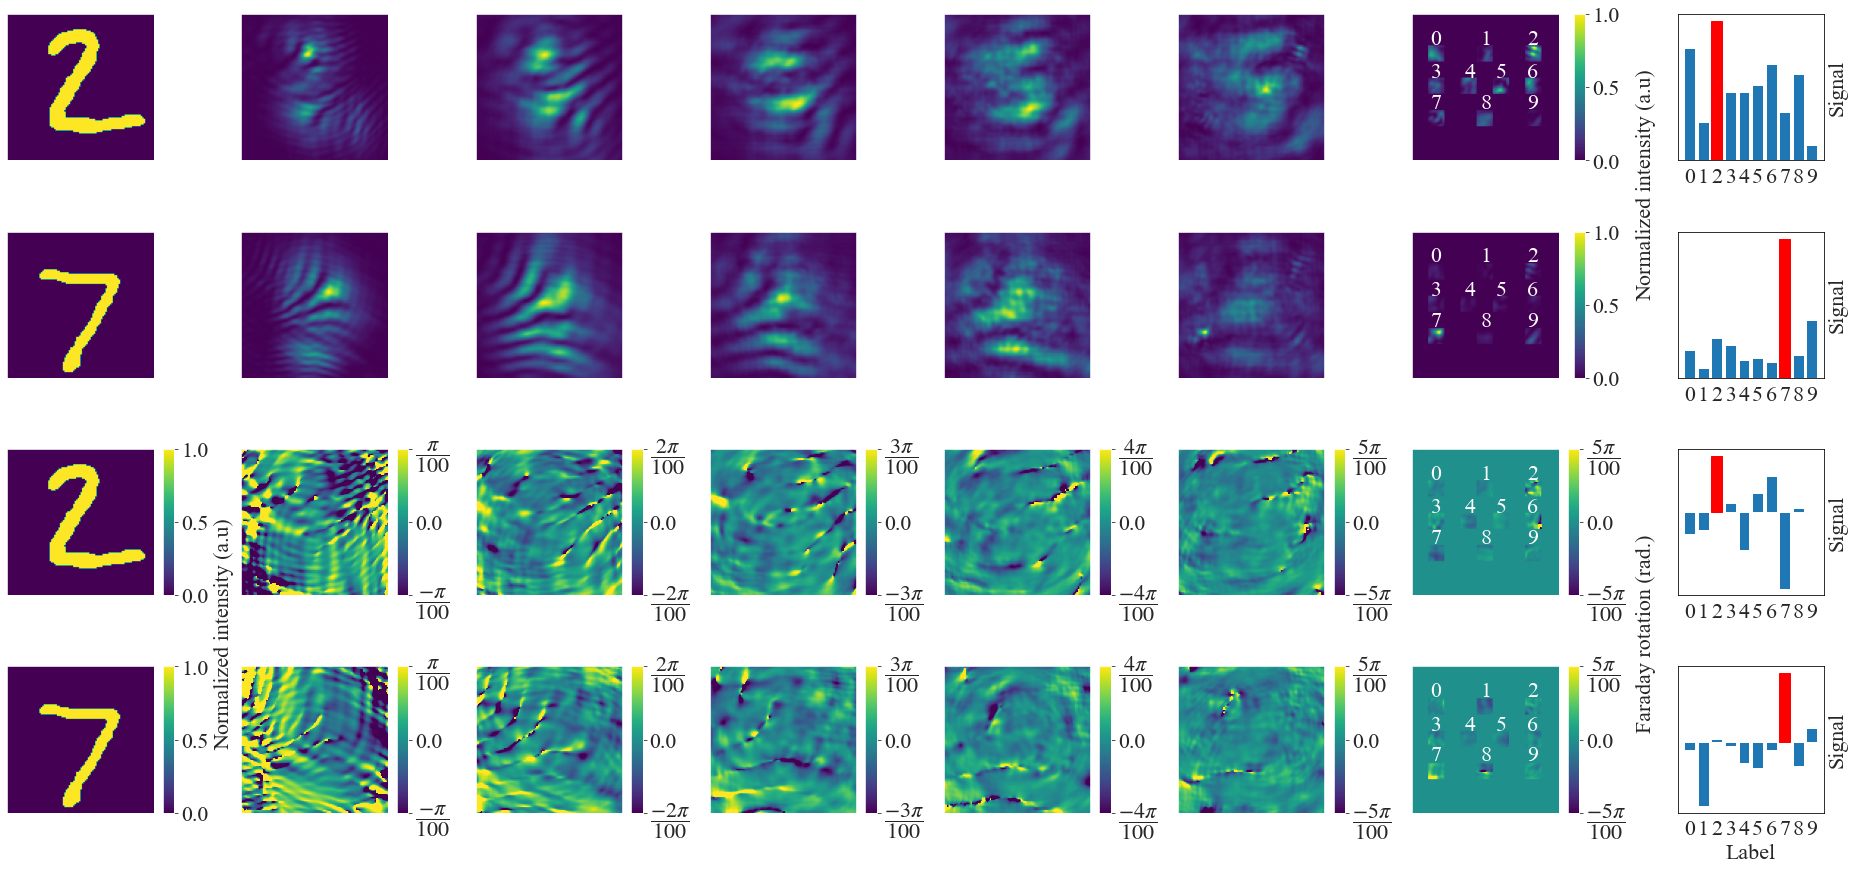

In [111]:
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"]=22
fig, axes = plt.subplots(4, len(pred1), figsize=(4 * len(pred1), 4 * 4))
fig.subplots_adjust(wspace=0.6, hspace=0)
for _ax in axes:
    for ax in _ax:
        ax.grid(False)
        ax.set_xticks([],color="none")
        ax.set_yticks([],color="none")

for j in range(2):
    for i in range(7):
        norm_image = pred[i][j,:,:] / np.max(pred[i][j,:,:])
        axes[j, i].imshow(norm_image, cmap='viridis', vmin=0., vmax=1.)

    axes[j, 6].tick_params(labelright=True, labelleft=False)
    axpos = axes[j,6].get_position()
    cbar_ax = fig.add_axes([0.805, axpos.y0, 0.005, axpos.height])
    cbar = fig.colorbar(axes[j, 6].images[0], cax=cbar_ax)

    axes[j, 6].text(12,20, "0", color="white")
    axes[j, 6].text(46,20, "1", color="white")
    axes[j, 6].text(78,20, "2", color="white")
    axes[j, 6].text(12,43, "3", color="white")
    axes[j, 6].text(35,43, "4", color="white")
    axes[j, 6].text(56.5,43, "5", color="white")
    axes[j, 6].text(78,43, "6", color="white")
    axes[j, 6].text(12,64, "7", color="white")
    axes[j, 6].text(46,64, "8", color="white")
    axes[j, 6].text(78,64, "9", color="white")

    # fig.colorbar(axes[0, 6].images[0], ax=axes[0, 6], label='Normalized intensity (a.u)')

    rect = axes[j, 7].bar(np.arange(0, 10, 1), pred[7][j, :], align='center')
    max_idx = np.argmax(pred[7][j, :])
    rect[max_idx].set_color("red")
    axes[j, 7].set_xticks(np.arange(0, 10, 1))
    # axes[j, 7].set_ylim(0, 1)
    axes[j, 7].grid(False)
    # axes[j, 7].set_xlabel("Label")
    axes[j, 7].set_ylabel("Signal")
    axes[j, 7].spines['top'].set_color('black')
    axes[j, 7].spines['bottom'].set_color('black')
    axes[j, 7].spines['left'].set_color('black')
    axes[j, 7].spines['right'].set_color('black')
    axes[j, 7].set_facecolor('white')
    axes[j, 7].yaxis.set_label_position("right")
    axes[j, 7].tick_params(labelright=True, labelleft=False)
    ax_pos = axes[j,6].get_position()
    axes[j, 7].set_position([0.85, ax_pos.y0, ax_pos.width, ax_pos.height])

for j in np.arange(2, 4):
    norm_image = pred[0][j,:,:] / np.max(pred[0][j,:,:])
    axes[j, 0].imshow(norm_image, cmap='viridis', vmin=0., vmax=1.)
    axpos = axes[j,0].get_position()
    cbar_ax = fig.add_axes([axpos.x1+0.004, axpos.y0, 0.005, axpos.height])
    cbar = fig.colorbar(axes[j, 0].images[0], cax=cbar_ax)
    # cbar.set_label('Normalized intensity (a.u)')
    for i in np.arange(1, 6):
        axes[j, i].imshow(pred[i][j,:,:], cmap='viridis', vmin=-i*np.pi/100, vmax=i*np.pi/100)
        axpos = axes[j,i].get_position()
        cbar_ax = fig.add_axes([axpos.x1+0.004, axpos.y0, 0.005, axpos.height])
        cbar = fig.colorbar(axes[j, i].images[0], cax=cbar_ax, ticks=[-i*np.pi/100, 0, i*np.pi/100])
        if i == 1:
            ticklabel = [r'$\dfrac{-\pi}{100}$', '0.0', r'$\dfrac{\pi}{100}$']
        else:
            ticklabel = [r'$\dfrac{-' + str(i) + '\pi}{100}$', '0.0', r'$\dfrac{' + str(i) + '\pi}{100}$']
        cbar.ax.set_yticklabels(ticklabel)
    
    axes[j, 6].imshow(pred[6][j,:,:], cmap='viridis', vmin=-5*np.pi/100, vmax=5*np.pi/100)
    axpos = axes[j,6].get_position()
    cbar_ax = fig.add_axes([axpos.x1+0.004, axpos.y0, 0.005, axpos.height])
    cbar = fig.colorbar(axes[j, 6].images[0], cax=cbar_ax, ticks=[-5*np.pi/100, 0, 5*np.pi/100])
    ticklabel = [r'$\dfrac{-5\pi}{100}$', '0.0', r'$\dfrac{5\pi}{100}$']
    cbar.ax.set_yticklabels(ticklabel)
    # cbar.set_label('Faraday rotation (rad.)')
    
    axes[j, 6].text(12,20, "0", color="white")
    axes[j, 6].text(46,20, "1", color="white")
    axes[j, 6].text(78,20, "2", color="white")
    axes[j, 6].text(12,43, "3", color="white")
    axes[j, 6].text(35,43, "4", color="white")
    axes[j, 6].text(56.5,43, "5", color="white")
    axes[j, 6].text(78,43, "6", color="white")
    axes[j, 6].text(12,64, "7", color="white")
    axes[j, 6].text(46,64, "8", color="white")
    axes[j, 6].text(78,64, "9", color="white")
    
    rect = axes[j, 7].bar(np.arange(0, 10, 1), pred[7][j, :], align='center')
    max_idx = np.argmax(pred[7][j, :])
    rect[max_idx].set_color("red")
    axes[j, 7].set_xticks(np.arange(0, 10, 1))
    # axes[j, 7].set_ylim(0, 1)
    # axes[j, 7].set_xlabel("Label")
    axes[j, 7].set_ylabel("Signal")
    axes[j, 7].spines['top'].set_color('black')
    axes[j, 7].spines['bottom'].set_color('black')
    axes[j, 7].spines['left'].set_color('black')
    axes[j, 7].spines['right'].set_color('black')
    axes[j, 7].set_facecolor('white')
    axes[j, 7].yaxis.set_label_position("right")
    axes[j, 7].tick_params(labelright=True, labelleft=False)
    ax_pos = axes[j,6].get_position()
    axes[j, 7].set_position([0.85, ax_pos.y0, ax_pos.width, ax_pos.height])

axes[3, 7].set_xlabel("Label")

fig.text(0.832, 0.605, 'Normalized intensity (a.u)', rotation=90)
fig.text(0.215, 0.215, 'Normalized intensity (a.u)', rotation=90)
fig.text(0.832, 0.23, 'Faraday rotation (rad.)', rotation=90)

        
fig.savefig("images/test4.png")